## SI 330 Lab 1: Regular Expressions

**Warm up**: Write a function that uses a regex to validate UM emails and returns a boolean indicator. Note that uniqnames consist entirely of lowercase letters and must be at least 3 letters, but no more than 8. 

It might be helpful to experiment and use an online regex tester first, such as https://regex101.com/. You may also find the regex documentation to be handy: https://docs.python.org/3/library/re.html

Once you pass the test cases, you may move on to the main task.

In [3]:
import re
def validate(um_email):
    ### BEGIN SOLUTION
    pattern = '^[a-z]{3,8}@umich\.edu'
    if re.match(pattern, um_email):
        return True
    return False
    ### END SOLUTION

In [4]:
assert validate('fjoiw23@anw.coin') == False
assert validate('1n2-03@umich.edu') == False
assert validate('awoein@umich.a') == False
assert validate('pqoinwe@umich.edu') == True
assert validate('weonaowii@umich.edu') == False
assert validate('wn@umich.edu') == False

In today's activity, you'll be scraping webpages for data. More specifically, we'll be diving into the world of restaurant reviews on Yelp. For starters, talk amongst your group, choose a restaurant to analyze, and then go to that webpage. Choose someplace that has at least 10 reviews. 

Once you've decided on a place, *share your selection on your Jamboard* and then save the page as an html file (see image below).
![Markley Dining Hall Yelp Page](yelp.png)

If you try opening this file in a text editor (not your browser; right-click and use the "open with" option), you'll notice it looks quite complicated and is very long (several thousand lines)! So, I'll trim this file for you in the following function (provided that you enter in the correct filename)!

In [5]:
import re

html_filename = 'yelp.html' ### YOUR FILENAME HERE
output_file = open('condensed.txt', 'w')

match_start_expr = r'<div class="lemon--div__\w* (?=spinner-container)'
match_end_expr = r'\d+ of \d+<\/span><\/div><\/div><\/div><\/div>'

with open(html_filename, 'r') as f:
    full_raw_text = f.read()
    start_idx = re.search(match_start_expr, full_raw_text).start()
    end_idx = re.search(match_end_expr, full_raw_text).end()

output_file.write(full_raw_text[start_idx:end_idx])
output_file.close()

After running the previous cell, look in your file directory again. There should be a new text file called `condensed.txt`. Go ahead and open it. It still looks messy, but should be a bit more manageable. I would suggest exploring it (with CTRL-F) before moving on.

Now, consult with your group see if you can find any patterns in the html file to help you locate where the reviews are buried. *Share these observations on Jamboard.* Then, once you are ready, complete the following tasks:

- 1. read in the condensed text file (DONE)
- 2. use a regular expression to find all reviews related to the restaurant chosen; store the reviews as a list of strings in `reviews`. (TODO)
- 3. because this was originally an html file, you will likely find escape characters: you can use `html.unescape(text)` to remove them. Replace `\xa0` and `<br>` with empty strings. (DONE; comment out to see difference if you're interested)

In [7]:
import re
import html

with open('condensed.txt', 'r') as f:
    data = f.read()

### BEGIN SOLUTION
pattern = r'(?:lang=\"en\">)(?P<review>.*?)(?:<\/span>)'
reviews = re.findall(pattern, data)
### END SOLUTION

reviews = [html.unescape(review).replace('\xa0', '').replace('<br>', '') for review in reviews]
print(reviews)

['COVID update! Taste has outdoor seating, in addition to indoor seating. We chose to sit outside, and there were maybe 4-5 tables outside. We felt like there was a comfortable 6 feet between tables, which was nice. We also appreciated that you scan a QR code to access the menu. We asked for sanitizer before eating and were given some :) As for the food, everything was delicious as always. Service was also great! I got the Berkshire pork (as I always do, haha) and my partner got the steak, and both were amazing.', "SO GOOD! I love that there's never really a long wait at this restaurant, and the food and drinks are really tasty. It definitely has date night vibes (and prices). I usually park in the structure nearby and walk over. For the food, I love the grilled berkeshire pork and the Tuna Poke for the appetizers. Everything feels light but yet still flavorful. Service is always wonderful as well. Would highly recommend!", "Had take-out from Taste Kitchen for hubby's Bday recently and

Now pause to *share your final regex pattern on Jamboard.* How did you approach solving this task? Why did you construct your pattern the way that you did?

Finally, we remove all punctuation and make all characters lowercase.

In [8]:
import string
reviews = [review.translate(str.maketrans('', '', string.punctuation)).lower() for review in reviews]

Run the following cell and *paste the corresponding word cloud onto Jamboard.* Is this what you expected?

(-0.5, 399.5, 199.5, -0.5)

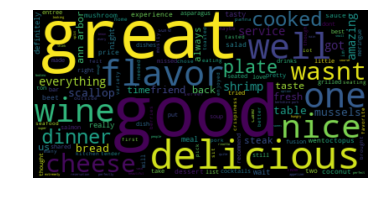

In [11]:
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

review_stopwords = set(['order', 'food', 'place', 'menu', 'eat', 'orders',
                        'restaurant', 'ordered', 'location'])

wordcloud = WordCloud(stopwords=STOPWORDS|review_stopwords).generate(' '.join(reviews))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

**Bonus Task**: Also use regexes to extract the reviewer name and rating (i.e. stars) for a particular review (use named groups), and store all this info in a dictionary. Come up with a separate word cloud for 1-3 star reviews, and 4-5 star reviews. Do you notice any interesting differences?